In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from IPython.display import Image

## from https://answers.opencv.org/question/53293/how-to-remove-line-on-music-sheet/
## OpenCV tutorial https://docs.opencv.org/master/dd/dd7/tutorial_morph_lines_detection.html

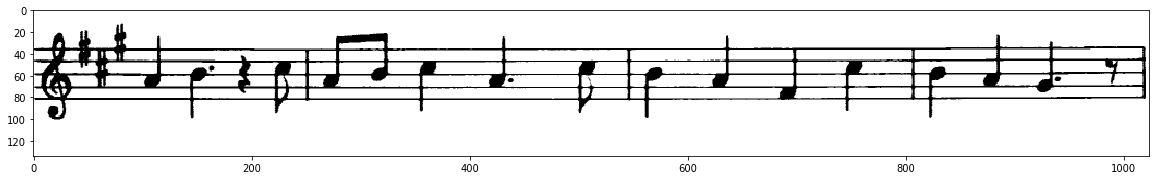

In [2]:
# read in and plot image
music = mpimg.imread("sheet_music_exemplar.png")
plt.figure(figsize=(20,10))
plt.imshow(music);

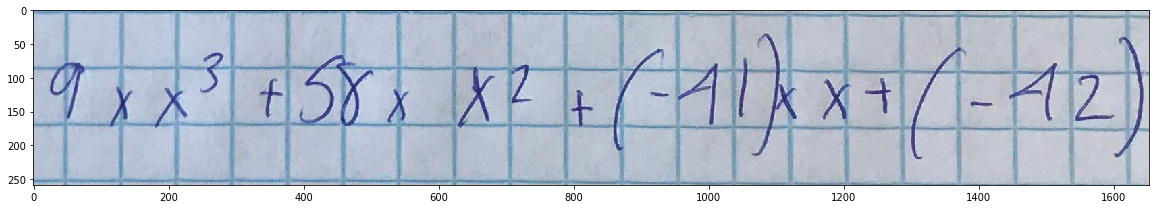

In [3]:
# read in and plot image
graph = mpimg.imread("graph_paper_ex.jpg")
plt.figure(figsize=(20,10))
plt.imshow(graph);

In [33]:
# color
file1 = "graph_paper_ex.jpg"
graph = cv2.imread(file1)

# black and white
file2 = "sheet_music_exemplar.png"
music = cv2.imread(file2)

In [35]:
####### start here to change input ########
file = graph

In [36]:
# convert to grayscale
print("Image dimensions:", music.shape)
gray = cv2.cvtColor(file, cv2.COLOR_BGR2GRAY)
print("Image dimensions after transform:", gray.shape)

Image dimensions: (134, 1024, 3)
Image dimensions after transform: (259, 1653)


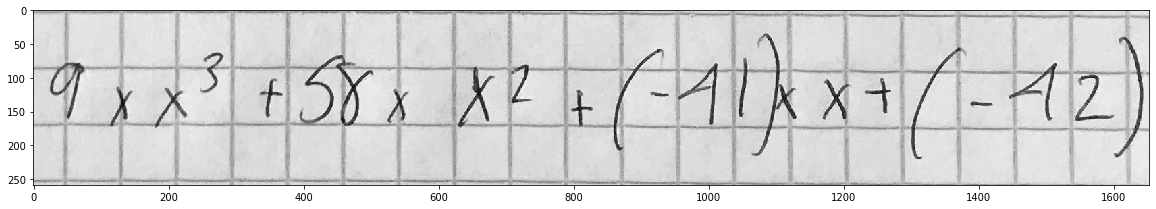

In [37]:
plt.figure(figsize=(20,10))
plt.imshow(gray,cmap='Greys_r');

In [38]:
# Apply adaptiveThreshold at the bitwise_not of gray, notice the ~ symbol
gray = cv2.bitwise_not(gray)
bw = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                        cv2.THRESH_BINARY, 15, -2)

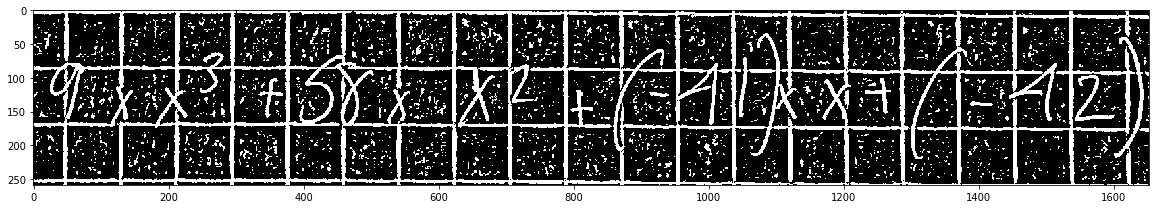

In [40]:
plt.figure(figsize=(20,10))
plt.imshow(bw,cmap='Greys_r');

In [68]:
# Create the images that will use to extract the horizontal and vertical lines
horizontal = np.copy(bw)

# Specify size on horizontal axis
cols = horizontal.shape[1]
horizontal_size = cols // 30
    
# Create structure element for extracting horizontal lines through morphology operations
horizontalStructure = cv2.getStructuringElement(cv2.MORPH_RECT, (horizontal_size, 1))

# Apply morphology operations
horizontal = cv2.erode(horizontal, horizontalStructure)
horizontal = cv2.dilate(horizontal, horizontalStructure)

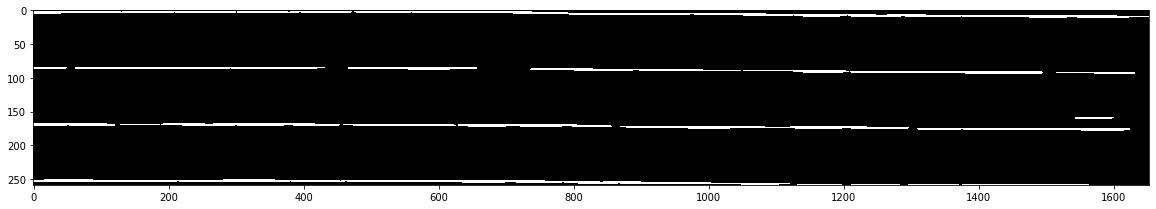

In [69]:
plt.figure(figsize=(20,10))
plt.imshow(horizontal,cmap='Greys_r');

In [80]:
# Create the images that will use to extract the horizontal and vertical lines
vertical = np.copy(bw)

# Specify size on vertical axis
rows = vertical.shape[0]
verticalsize = rows // 40

# Create structure element for extracting vertical lines through morphology operations
verticalStructure = cv2.getStructuringElement(cv2.MORPH_RECT, (1, verticalsize))

# Apply morphology operations
vertical = cv2.erode(vertical, verticalStructure)
vertical = cv2.dilate(vertical, verticalStructure)

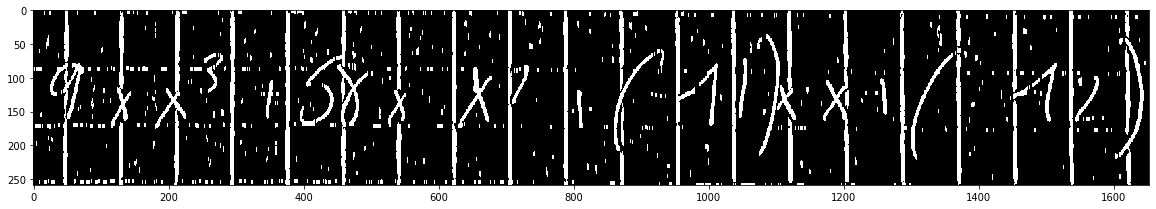

In [81]:
# show the extracted horizontal lines
plt.figure(figsize=(20,10))
plt.imshow(vertical,cmap='Greys_r');

In [82]:
# Inverse vertical image
vertical = cv2.bitwise_not(vertical)

'''
Extract edges and smooth image according to the logic
1. extract edges
2. dilate(edges)
3. src.copyTo(smooth)
4. blur smooth img
5. smooth.copyTo(src, edges)
'''

# Step 1
edges = cv2.adaptiveThreshold(vertical, 255, cv2.ADAPTIVE_THRESH_MEAN_C, \
                            cv2.THRESH_BINARY, 3, -2)

# Step 2
kernel = np.ones((2, 2), np.uint8)
edges = cv2.dilate(edges, kernel)

# Step 3
smooth = np.copy(vertical)

# Step 4
smooth = cv2.blur(smooth, (2, 2))

# Step 5
(rows, cols) = np.where(edges != 0)
vertical[rows, cols] = smooth[rows, cols]



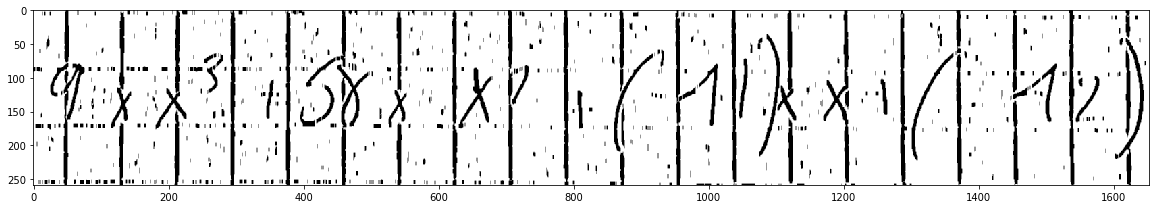

In [83]:
plt.figure(figsize=(20,10))
plt.imshow(vertical,cmap='Greys_r');

4